In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,learning_curve,validation_curve,\
GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('wdbc.data')#https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 1.Pipeline

In [2]:
x = df.iloc[:,2:].values
y = df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3,
                                                 stratify=y,
                                                 random_state=1)

In [4]:
pip_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(random_state=1,solver='lbfgs'))
pip_lr.fit(x_train,y_train)
y_pred = pip_lr.predict(x_test)
print('test accuracy: %.3f' % pip_lr.score(x_test,y_test))

test accuracy: 0.936


# K-fold 

In [5]:
kfold = StratifiedKFold(n_splits=10).split(x_train,y_train)
scores = []
for k ,(train,test) in enumerate(kfold):
    pip_lr.fit(x_train[train],y_train[train])
    score = pip_lr.score(x_train[test],y_train[test])
    scores.append(score)
    print('fold: %2d, class dist.: %s, acc:%.3f' % (k+1,np.bincount(y_train[train]),score))

fold:  1, class dist.: [225 132], acc:0.950
fold:  2, class dist.: [225 132], acc:0.950
fold:  3, class dist.: [225 132], acc:0.925
fold:  4, class dist.: [225 132], acc:0.925
fold:  5, class dist.: [225 132], acc:0.925
fold:  6, class dist.: [225 132], acc:0.950
fold:  7, class dist.: [225 132], acc:0.975
fold:  8, class dist.: [225 133], acc:0.923
fold:  9, class dist.: [225 133], acc:0.974
fold: 10, class dist.: [225 133], acc:0.974


# cross_val_score


In [6]:
scores = cross_val_score(estimator=pip_lr,
                         X = x_train,
                         y =y_train,
                         cv = 10,
                         n_jobs=1)
print('CV accuracy scores: %s , CV accuracy:%.4f +/- %.4f' % (scores,np.mean(scores),np.std(scores)))

CV accuracy scores: [0.95       0.95       0.925      0.925      0.925      0.95
 0.975      0.92307692 0.97435897 0.97435897] , CV accuracy:0.9472 +/- 0.0208


# Learning Curve algoration debug

In [17]:
import matplotlib.pyplot as plt

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           solver='lbfgs',
                                           max_iter=10000
                                           ))

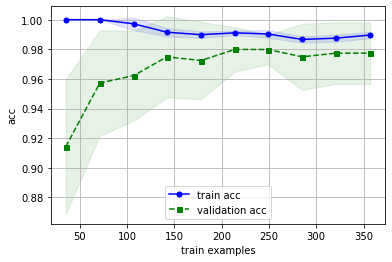

In [8]:
train_sizes,train_scores,test_scores = learning_curve(estimator=pipe_lr,
                                                      X = x_train,
                                                      y = y_train,
                                                      train_sizes=np.linspace(0.1,1.0,10),
                                                      cv = 10,
                                                      n_jobs=2)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,
         color='b',marker='o',
         markersize = 5, label = 'train acc')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.1,color = 'b')

plt.plot(train_sizes,test_mean,
         color = 'g',linestyle = '--',
         marker = 's',markersize = 5,
         label = 'validation acc')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha =0.1,color = 'g')

plt.grid()
plt.xlabel('train examples')
plt.ylabel('acc')
plt.legend(loc = 'lower center')

# validation_curve overfitting and underfitting

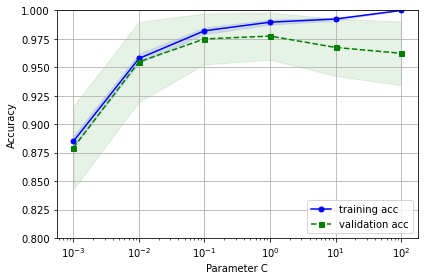

In [9]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=x_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='b', marker='o', 
         markersize=5, label='training acc')

plt.fill_between(param_range, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.1,color='b')

plt.plot(param_range, test_mean, 
         color='g', linestyle='--', 
         marker='s', markersize=5, 
         label='validation acc')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.1, color='g')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

# Grid Search (brute-force)

In [13]:

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


param_grid = [{'svc__C':param_range,
               'svc__kernel': ['linear']},
              {'svc__C':param_range,
               'svc__gamma':param_range,
               'svc__kernel': ['rbf']}]        # svc__gamma 為 Kernel SVM 特有
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10,
                  n_jobs = -1)

gs = gs.fit(x_train,y_train)
clf = gs.best_estimator_
clf.fit(x_train,y_train)
print(gs.best_score_)
print(gs.best_params_)
print('test acc: %.3f' % clf.score(x_test,y_test))

0.9799358974358974
{'svc__C': 0.1, 'svc__kernel': 'linear'}
test acc: 0.947


In [14]:
#巢狀式交叉驗證
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv =2)

scores = cross_val_score(gs,x_train,y_train,
                         scoring = 'accuracy',cv = 5)

print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),
                                     np.std(scores)))

CV accuracy: 0.972 +/- 0.027


In [15]:
gs = GridSearchCV(estimator =DecisionTreeClassifier(random_state=0),
                             param_grid = [{'max_depth':[1,2,3,4,5,6,7,None]}],
                             scoring = 'accuracy',cv = 2)
scores1 = cross_val_score(gs,x_train,y_train,
                         scoring = 'accuracy',cv = 5)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores1),
                                     np.std(scores1)))

CV accuracy: 0.947 +/- 0.032


[[107   0]
 [  7  57]]


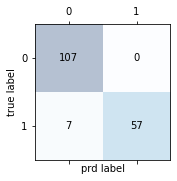

In [20]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(x_train,y_train)
y_pred = pipe_svc.predict(x_test)
confmat = confusion_matrix(y_test,y_pred)
print(confmat)

#vision

fig,ax = plt.subplots(figsize = (2.5,2.5))
ax.matshow(confmat,cmap = plt.cm.Blues,alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j,y = i,
               s = confmat[i,j],
               va = 'center' , ha ='center')
plt.xlabel('prd label')
plt.ylabel('true label')
plt.show()